"La Revisión de 2022 del World Population Prospects es la vigésima séptima edición de las estimaciones y proyecciones demográficas oficiales de la UN preparadas por la División de Población del Departamento de Asuntos Económicos y Sociales de la Secretaría de la UN. Presenta estimaciones de población desde 1950 hasta el presente para 237 países o áreas, respaldadas por análisis de tendencias demográficas históricas. Esta última evaluación considera los resultados de 1.758 censos nacionales de población realizados entre 1950 y 2022, así como información de los sistemas de registro civil y de 2.890 encuestas por muestreo representativas a nivel nacional. La revisión de 2022 también presenta proyecciones de población hasta el año 2100 que reflejan una variedad de resultados plausibles. a nivel mundial, regional y nacional."[[1]](#1)

Los resultados de este reporte yacen en una serie de archivos de Excel que muestra indicadores demograficos claves para cada grupo de desarrollo de la UN. A continuación se presenta un analísis y numerosas visualizaciones de la información contenida en estos archivos.

<a id="1">[1]</a>
https://population.un.org/wpp/ - World Population Prospects 2022 - United Nations' Department of Economic and Social Affairs, Population Division

## Importación de dependencias y lectura de datos en bruto

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
wpp_df = pd.read_excel("../datasets/raw/world_population_prospects/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx", index_col=0)
wpp_df.drop(['Variant','Notes','Location code','ISO3 Alpha-code','ISO2 Alpha-code','SDMX code**','Parent code'],axis=1,inplace=True)

## Vista superficial al dataset

En este dataset se encuentran un gran numero de campos. Estos podrían ser resumidos o cortados posteriormente al limpiar y normalizar los datos para ingresarse a las tablas SQL, quizás mediante su acotación en variables categoricas ordinales, ya que varios son algo redundantes (la tasa de sexo de la población, por ejemplo)

In [4]:
wpp_df

,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
Index,,,,,,,,,,,,,,,,,,,,,
1,WORLD,World,1950.0,2477674.732,2499322.157,1245362.965,1253959.192,19.166,99.314,22.224,...,580.75,498.04,240.316,271.625,208.192,378.697,430.259,324.931,0,0
2,WORLD,World,1951.0,2520969.582,2543130.38,1267473.182,1275657.198,19.502,99.358,22.172,...,566.728,490.199,231.177,258.09,203.78,368.319,415.836,319.336,0,0
3,WORLD,World,1952.0,2565291.179,2590270.899,1291399.982,1298870.917,19.864,99.425,22.108,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.91,0,0
4,WORLD,World,1953.0,2615250.618,2640278.797,1316659.222,1323619.574,20.247,99.474,22.036,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0,0
5,WORLD,World,1954.0,2665306.975,2691979.339,1342923.171,1349056.168,20.643,99.545,21.952,...,523.124,458.484,205.762,224.05,187.444,335.442,374.658,295.994,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20592,Wallis and Futuna Islands,Country/Area,2017.0,12.002,11.936,5.769,6.167,85.257,93.562,33.847,...,92.066,102.718,30.643,26.781,33.892,82.852,82.197,83.32,-0.201,-16.706
20593,Wallis and Futuna Islands,Country/Area,2018.0,11.87,11.816,5.703,6.112,84.396,93.301,34.397,...,99.196,89.345,29.201,29.159,29.17,79.633,88.556,72.163,-0.171,-14.368
20594,Wallis and Futuna Islands,Country/Area,2019.0,11.761,11.714,5.648,6.066,83.671,93.109,34.962,...,77.781,80.136,24.304,22.291,25.981,66.639,69.324,64.496,-0.171,-14.489


### Tipos de regiones

En los la columna "Type" del dataset, observamos que los distintos grupos son algo díficiles de generalizar. El grupo "World" se puede extrapolar de los demás datos, el grupo "Label/Separator" es un valor que es inútil para nuestros propositos, y los demás los tendremos que analizar a pie para ver sí vale la pena mantenerlos adentro:

In [5]:
wpp_df.Type.unique()

array(['World', 'Label/Separator', 'SDG region', 'Development Group',
       'Special other', 'Income Group', 'Region', 'Subregion',
       'Country/Area'], dtype=object)

'SDG Region' corresponde a las regiones divididas según aquellas que considera Sustainable Development Goals, un reporte de la división de estadísticas de la UN.

In [6]:
wpp_df[wpp_df.Type == 'SDG region']['Region, subregion, country or area *'].unique()

array(['Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America'],
      dtype=object)

'Region' en este dataset simplemente se refiere a los continentes.

In [7]:
wpp_df[wpp_df.Type == 'Region']['Region, subregion, country or area *'].unique()

array(['AFRICA', 'ASIA', 'EUROPE', 'LATIN AMERICA AND THE CARIBBEAN',
       'NORTHERN AMERICA', 'OCEANIA'], dtype=object)

'Subregion' se refiere, entonces, a las subregiones de estos continentes:

In [8]:
wpp_df[wpp_df.Type == 'Subregion']['Region, subregion, country or area *'].unique()

array(['Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Central Asia',
       'Eastern Asia', 'Southern Asia', 'South-Eastern Asia',
       'Western Asia', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Caribbean',
       'Central America', 'South America', 'Australia/New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia'], dtype=object)

Las siguientes divide los países según grupos de ingreso y desarrollo economico, sería prudente ponerlos en un dataset separado posteriormente.

In [9]:
wpp_df[wpp_df.Type == 'Special other']['Region, subregion, country or area *'].unique()

array(['Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)'], dtype=object)

In [10]:
wpp_df[wpp_df.Type == 'Income Group']['Region, subregion, country or area *'].unique()

array(['High-income countries', 'Middle-income countries',
       'Upper-middle-income countries', 'Lower-middle-income countries',
       'Low-income countries', 'No income group available'], dtype=object)

In [11]:
wpp_df[wpp_df.Type == 'Development Group']['Region, subregion, country or area *'].unique()

array(['More developed regions', 'Less developed regions',
       'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China'], dtype=object)

### Busqueda de valores duplicados o nulos

Buscamos primeros cuales son los valores nulos y en que columnas están:

In [12]:
null_counts = wpp_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Year    4
dtype: int64

Evaluemos cuales son estos valores nulos en Year:

In [13]:
wpp_df[pd.to_numeric(wpp_df['Year'], errors='coerce').isnull()]['Year']

Index
73     NaN
650    NaN
1155   NaN
1588   NaN
Name: Year, dtype: float64

In [14]:
wpp_df.loc[[73,650,1155,1588]]

,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
Index,,,,,,,,,,,,,,,,,,,,,
73,Sustainable Development Goal (SDG) regions,Label/Separator,NaN,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,UN development groups,Label/Separator,NaN,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,World Bank income groups,Label/Separator,NaN,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,Geographic regions,Label/Separator,NaN,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Son inutiles para nuestro analísis, así que los borraremos sin más.

In [15]:
wpp_df.dropna(inplace=True)

Después, revisaremos los valores duplicados:

In [16]:
wpp_df[wpp_df.duplicated()]

,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
Index,,,,,,,,,,,,,,,,,,,,,


Finalmente, revisaremos si hay valores no-numericos en las columnas pertinentes:

In [71]:
j = []
for i in wpp_df.iloc[:,3:57].columns:
    j.append(len(wpp_df[wpp_df[i] == '...']))
print('Numero total de valores faltantes: ' + str(np.sum(j)))

Numero total de valores faltantes: 7142


In [72]:
print('Numero total de valores: ' + str(20592 * 57))

Numero total de valores: 1173744


In [68]:
print('Porcentaje de valores faltantes: ' + str((7142 / 1173744) * 100) + '%')

0.6084802137433717

0.6% de todos los valores almacenados en el dataset son valores faltantes. Para la normalización, estos se reduciran a 0, para que se puedan encajar dentro de campos númericos en la base de datos SQL con mayor facilidad. En el caso que se necesiten hacer operaciones o queries (como promedios o sumas) se podrían filtrar de antemano estos valores sin mayor problema, ya que en esta columnas se encuentran floats que no tocan a 0. 

## Carga de datasets filtrados por los países con mayor flujo migratorio

Para el siguiente EDA, nos resulta relevante es analizar los países que tienen mayor flujo (de entrada y salida) de migrantes, por lo que vamos a cargar un dataframe que viene normalizado y con filtro previo.

In [80]:
top_df = pd.read_csv('../datasets/processed/world_population_prospects/WPP-top.csv')

In [84]:
top_df

,Unnamed: 0,Index,region,type,year,total_population_as_of_1_january__thousands_,total_population_as_of_1_july__thousands_,male_population_as_of_1_july__thousands_,female_population_as_of_1_july__thousands_,population_density_as_of_1_july__persons_per_square_km_,...,male_mortality_before_age_60__deaths_under_age_60_per_1000_male_live_births_,female_mortality_before_age_60__deaths_under_age_60_per_1000_female_live_births_,mortality_between_age_15_and_50_both_sexes__deaths_under_age_50_per_1000_alive_at_age_15_,male_mortality_between_age_15_and_50__deaths_under_age_50_per_1000_males_alive_at_age_15_,female_mortality_between_age_15_and_50__deaths_under_age_50_per_1000_females_alive_at_age_15_,mortality_between_age_15_and_60_both_sexes__deaths_under_age_60_per_1000_alive_at_age_15_,male_mortality_between_age_15_and_60__deaths_under_age_60_per_1000_males_alive_at_age_15_,female_mortality_between_age_15_and_60__deaths_under_age_60_per_1000_females_alive_at_age_15_,net_number_of_migrants__thousands_,net_migration_rate__per_1000_population_
0,0,5189,cote d'ivoire,Country/Area,1950.0,2698.514,2736.909,1385.611,1351.298,8.607,...,739.637,689.934,339.204,353.041,324.574,480.252,495.128,464.748,16.535,6.058
1,1,5190,cote d'ivoire,Country/Area,1951.0,2775.303,2814.320,1424.528,1389.791,8.850,...,735.746,686.520,336.567,350.205,322.056,477.244,492.146,461.608,14.781,5.264
2,2,5191,cote d'ivoire,Country/Area,1952.0,2853.336,2893.687,1464.377,1429.311,9.100,...,729.249,682.006,333.956,346.612,320.437,474.563,488.731,459.640,13.969,4.838
3,3,5192,cote d'ivoire,Country/Area,1953.0,2934.038,2976.271,1505.926,1470.346,9.359,...,721.813,676.699,330.762,342.492,318.189,471.071,484.346,457.033,13.962,4.701
4,4,5193,cote d'ivoire,Country/Area,1954.0,3018.505,3062.945,1549.666,1513.279,9.632,...,715.310,670.190,327.800,339.862,314.807,467.848,481.910,452.893,14.618,4.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,1147,18792,australia,Country/Area,2017.0,24392.368,24590.334,12198.756,12391.577,3.201,...,79.212,47.501,27.690,36.343,19.036,58.858,74.453,43.343,244.875,10.008
8060,1148,18793,australia,Country/Area,2018.0,24788.299,24979.230,12390.146,12589.085,3.252,...,77.701,46.492,26.573,34.732,18.399,57.932,73.156,42.797,220.307,8.857
8061,1149,18794,australia,Country/Area,2019.0,25170.161,25357.170,12578.919,12778.251,3.301,...,82.890,48.494,29.643,38.993,20.252,61.581,78.428,44.800,235.860,9.345
8062,1150,18795,australia,Country/Area,2020.0,25544.179,25670.051,12738.210,12931.840,3.341,...,46.947,35.299,13.221,14.820,11.627,37.239,42.746,31.869,117.929,4.605


## Población total según país

Sacando un promedio a lo largo de los años, podemos ver cuales son los paises que por lo general tienen un mayor numero de población:

In [85]:
total_popul_df = (
    top_df
    .groupby('region')['total_population_as_of_1_january__thousands_']
    .mean()
    .reset_index()
    .sort_values(by='total_population_as_of_1_january__thousands_',ascending=False)
)

<AxesSubplot: ylabel='total_population_as_of_1_january__thousands_'>

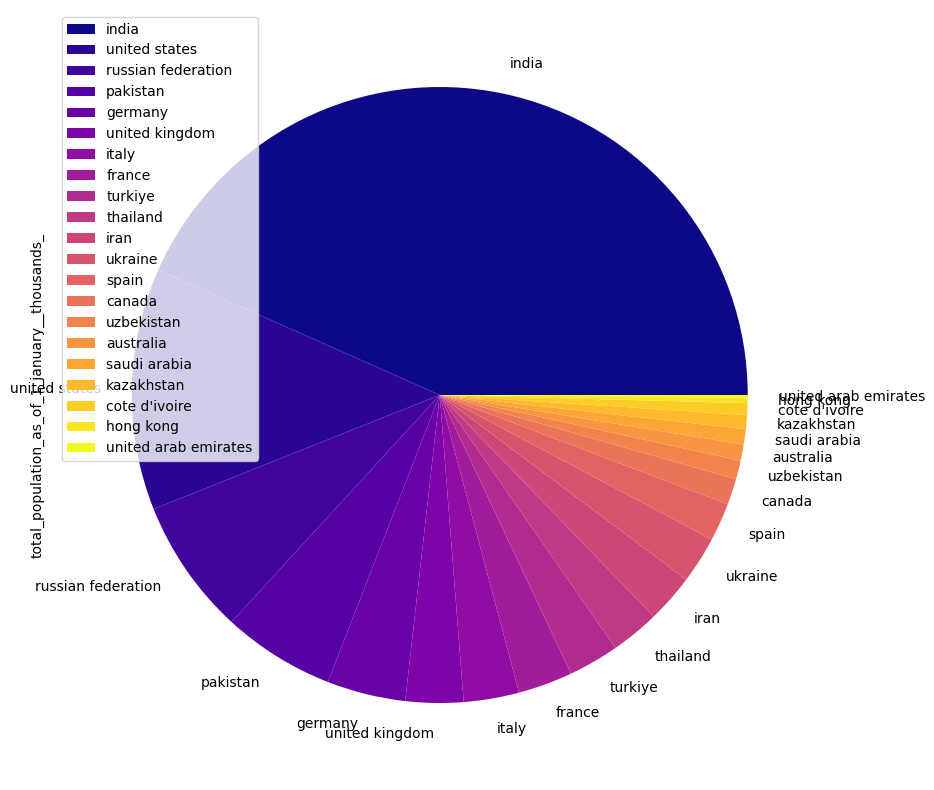

In [96]:
total_popul_df.set_index('region').plot.pie(y='total_population_as_of_1_january__thousands_', figsize=(10,10),colormap='plasma')

Y también podemos ver su crecimiento a lo largo del tiempo, por cada año:

In [105]:
total_popul_df = (
    top_df
    .groupby(['region','year'])['total_population_as_of_1_january__thousands_']
    .mean()
    .reset_index()
    .sort_values(by='year')
)

In [107]:
total_popul_df2 = pd.DataFrame(index=total_popul_df.year.unique(),columns=total_popul_df['region'].unique().tolist())
for i in total_popul_df2.columns:
    total_popul_df2[i] = total_popul_df[total_popul_df['region'] == i].set_index('year')['total_population_as_of_1_january__thousands_']

<AxesSubplot: title={'center': 'Crecimiento de la población a lo largo de los años'}, xlabel='Año', ylabel='Población en miles de millones'>

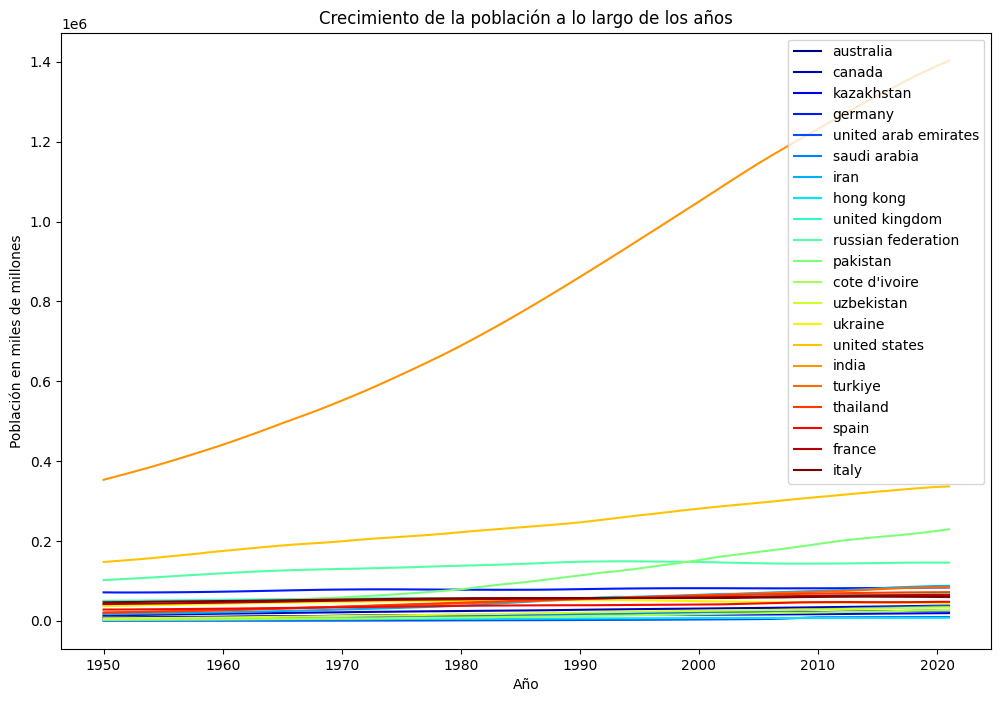

In [111]:
total_popul_df2.plot.line(title='Crecimiento de la población a lo largo de los años',figsize=(12,8),ylabel='Población en miles de millones',xlabel='Año',colormap='jet')

Podemos ver con bastante facilidad que, en cuanto a los ultimos 50 años se habla, la India es el país de nuestro conjunto que ha recibido un crecimiento poblacional mayor, estando muy, muy por encima de los demás tanto en numero de población como en crecimiento. Justo por debajo, vemos a los Estados Unidos, que junto a una inmensa población inicial tiene un crecimiento bastante estable, y justo por debajo de este tenemos a Pakistan, que es el segundo país con mayor crecimiento a lo largo del tiempo.
Veamos este mismo grafico, pero quitando los 5 países con poblaciones más grandes:

<AxesSubplot: title={'center': 'Crecimiento de la población a lo largo de los años'}, xlabel='Año', ylabel='Población en miles de millones'>

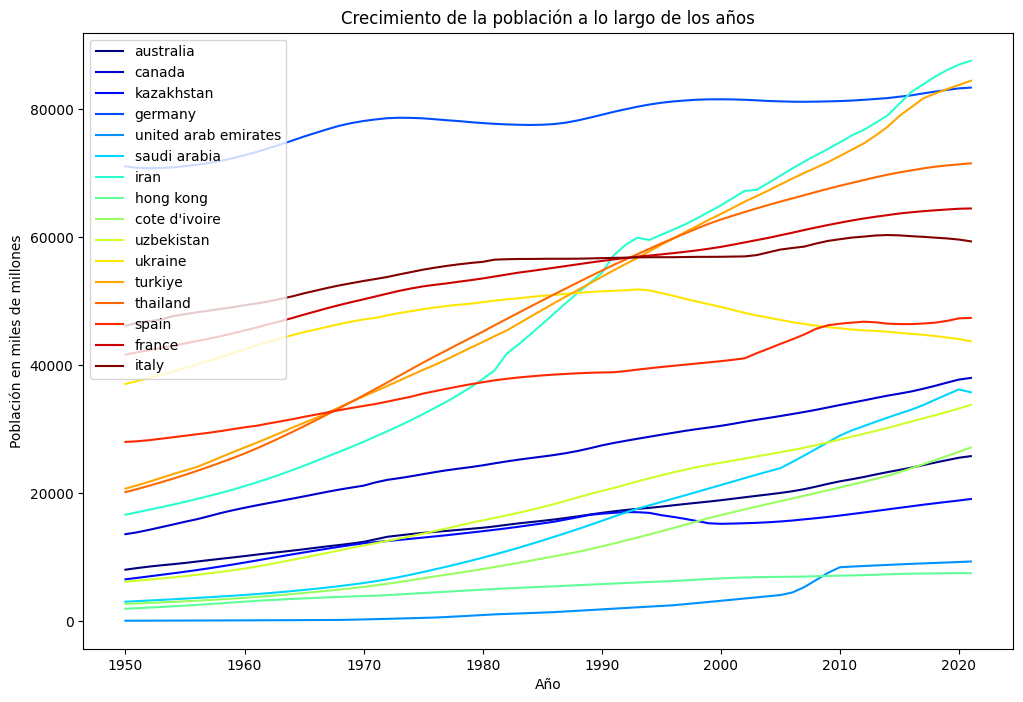

In [114]:
total_popul_df2.drop(['india','united states','united kingdom','russian federation','pakistan'],axis=1).plot.line(title='Crecimiento de la población a lo largo de los años',figsize=(12,8),ylabel='Población en miles de millones',xlabel='Año',colormap='jet')

Los países en el anterior grafico que muestran el mayor crecimiento de población son Tailandia, Turkia e Iran. El punto medio de este crecimiento coincide con una estabilización o directamente una caida en otros países (como Ukrania, Italia, Francia y Alemania). Vemos además que los Emiratos Arabes Unidos, España, Italia y Arabia Saudita tienen un pico en su población que coinciden alrededor de 2010, por lo que sería quizás prudente analizar este momento con mayor detenimiento.

## Tasa de natalidad según país

In [122]:
birth_rate_df = (
    top_df
    .groupby('region')['crude_birth_rate__births_per_1000_population_']
    .mean()
    .reset_index()
    .sort_values(by='crude_birth_rate__births_per_1000_population_',ascending=False)
)

<AxesSubplot: ylabel='crude_birth_rate__births_per_1000_population_'>

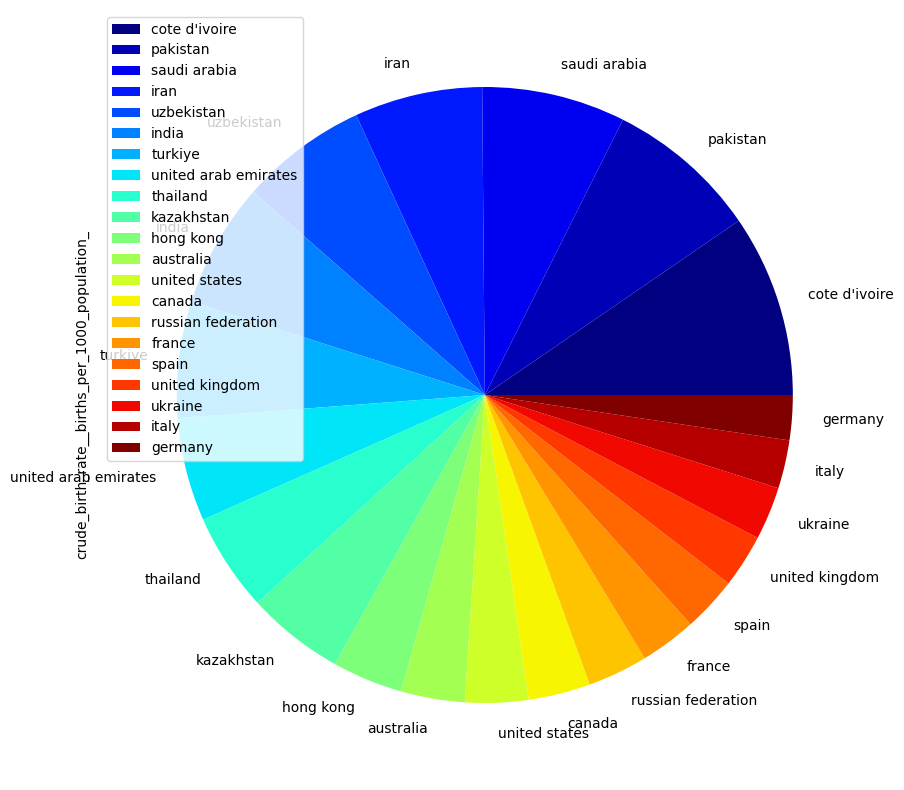

In [124]:
birth_rate_df.set_index('region').plot.pie(y='crude_birth_rate__births_per_1000_population_', figsize=(10,10),colormap='jet')

Podemos suponer acá viendo este grafo superficialmente que la tasa de natalidad por lo general aumenta conforme el país es menos desarrollado tanto tecnologicamente como economicamente, aunque vemos inmediatamente algunas excepciones a esta regla (La India y Arabia Saudita). Sería bueno analizar esta hipotesis más a fondo haciendo una validación cruzada con algún otro dataset.

In [125]:
birth_rate_countries = birth_rate_df['region'].unique().tolist()
birth_rate_df = (
    top_df
    .groupby(['region','year'])['crude_birth_rate__births_per_1000_population_']
    .mean()
    .reset_index()
    .sort_values(by='year')
)

In [126]:
birth_rate_df2 = pd.DataFrame(index=birth_rate_df.year.unique(),columns=birth_rate_countries)
for i in birth_rate_df2.columns:
    birth_rate_df2[i] = birth_rate_df[birth_rate_df['region'] == i].set_index('year')['crude_birth_rate__births_per_1000_population_']

<AxesSubplot: title={'center': 'Tasa de natalidad a lo largo de los años'}, xlabel='Año', ylabel='Tasa de natalidad'>

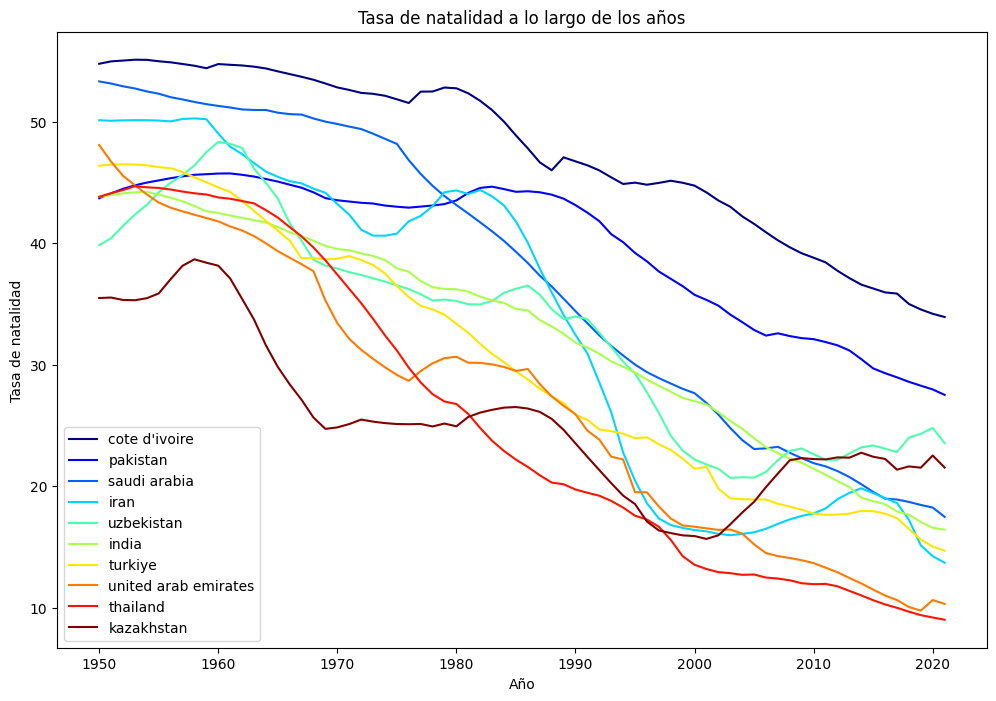

In [134]:
birth_rate_df2.loc[:,'cote d\'ivoire':'kazakhstan'].plot.line(title='Tasa de natalidad a lo largo de los años',figsize=(12,8),ylabel='Tasa de natalidad',xlabel='Año',colormap='jet')

La tendencía acá por lo general es el decrecimiento. Hay unos puntos increiblemente abruptos de baja en la tasa de natalidad, que no llegan a estabilizarse del todo después (todavía, al menos): es muy obvio en Iran, Kazakhstan, y Uzbekistan, y se puede asumir que es gracias a los conflictos belicos que han ocurrido en estos países (Kazakhstan, sin embargo, muestra una tasa de natalidad algo bipolar, y quizás sea un caso a analizar con detenimiento en caso de que se presente con notoriedad en otros conjuntos de datos). En Tailandia y Arabia Saudita vemos el decrecimiento más marcado.

<AxesSubplot: title={'center': 'Tasa de natalidad a lo largo de los años'}, xlabel='Año', ylabel='Tasa de natalidad'>

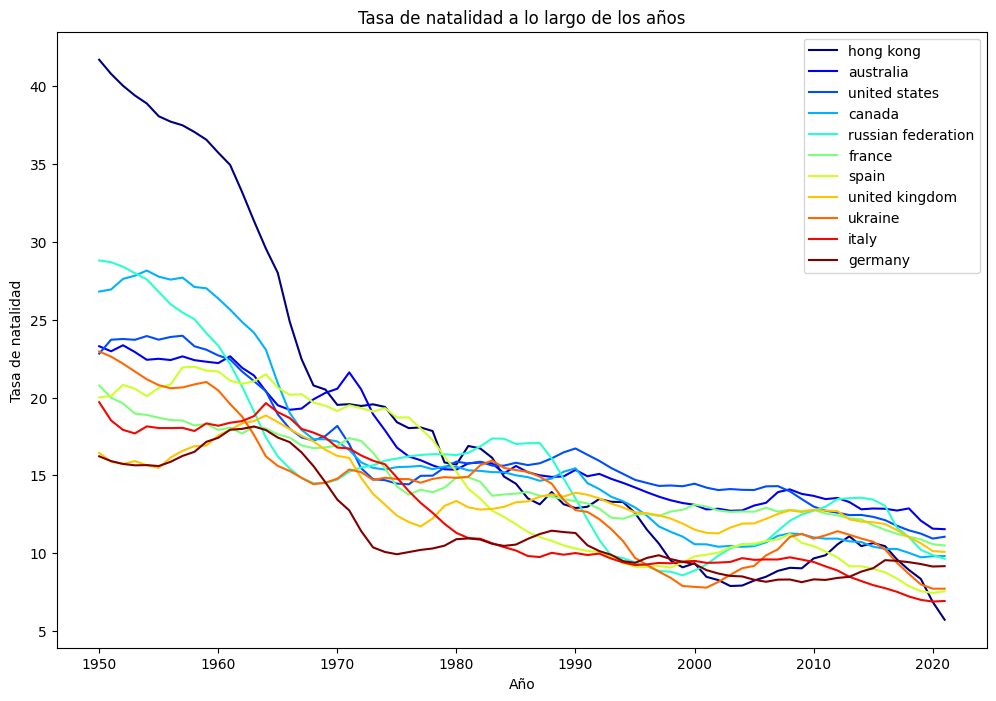

In [136]:
birth_rate_df2.loc[:,'hong kong':].plot.line(title='Tasa de natalidad a lo largo de los años',figsize=(12,8),ylabel='Tasa de natalidad',xlabel='Año',colormap='jet')

Hay una caida en la tasa de natalidad practicamente universal después de los años 60, a lo cual se le pueden asignar cualquier numero de causas: quizás es simplemente una estabilización después del boom post-bélico, quizás se debe a un uso mayor y más frecuente de preservativos (o mayor acceso a estos debido a un poder de consumo mayor), o quizás tiene algo que ver con el movimiento de liberación sexual en los países del mundo occidental, entre otras a considerar. Hong Kong en este grafo sufre de la caida más notoria en cuanto a tasa de natalidad, llegando al punto más bajo en 2020.

## Relación entre tasa de mortalidad, migraciones, y tasa de natalidad

In [143]:
birth_mort_rel_df = (
    top_df
    .groupby(['year'])[['crude_birth_rate__births_per_1000_population_','infant_mortality_rate__infant_deaths_per_1000_live_births_','net_migration_rate__per_1000_population_']]
    .mean()
    .reset_index()
    .sort_values(by='year')
)

In [144]:
birth_mort_rel_df = birth_mort_rel_df.set_index('year')

<AxesSubplot: xlabel='year'>

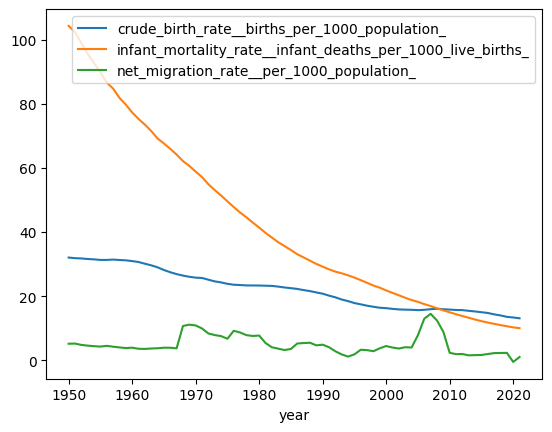

In [145]:
birth_mort_rel_df.plot.line()

Como es de esperar, la tasa de nacimientos esta correlacionada positivamente con la tasa de mortalidad infantil. En este conjunto de datos no existe mucha información relevante acerca de las migraciones, por lo que se necesitaría analizar teniendo datos provenientes de otro sitio para hablar con certeza, pero acá se ve un claro pico en el numero de migraciones a la par de que la tasa de natalidad empieza a estar por encima de la tasa de mortalidad infantil: podría esta estabilización haberse producido a causa de el flujo migratorio, o simplemente se trata de una coincidencia?

## Cambio de población según países

In [169]:
popul_change_df = (
    top_df
    .groupby('region')['population_change__thousands_']
    .mean()
    .reset_index()
    .sort_values(by='population_change__thousands_',ascending=False)
)

<AxesSubplot: ylabel='population_change__thousands_'>

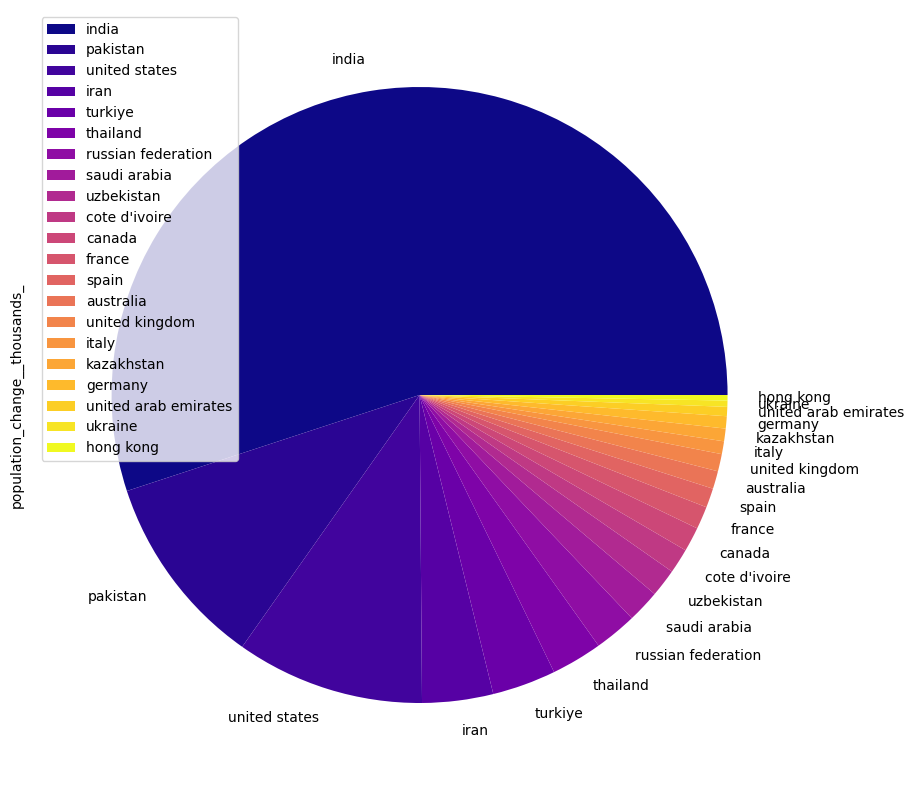

In [170]:
popul_change_df.set_index('region').plot.pie(y='population_change__thousands_', figsize=(10,10),colormap='plasma')

'Population Change' en este caso se refiere al incremento total que hay en una población a lo largo de un periodo, o dicho de otra forma, la diferencia entre la población al final de ese periodo y al inicio de un periodo. Por ende, acá principalmente vamos a ver cuales países poseen los cambios más abruptos y de mayor gravedad que han habido en la población. Veamos el anterior grafo, pero quitando del panorama a la India, Pakistan y Estados Unidos:

<AxesSubplot: ylabel='population_change__thousands_'>

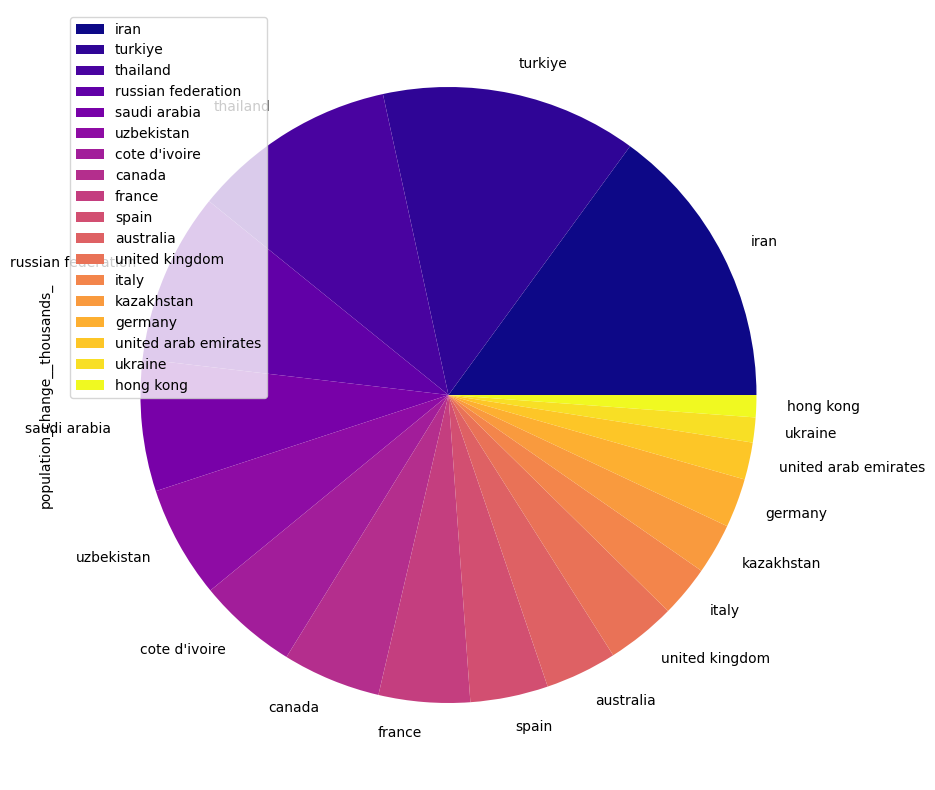

In [171]:
popul_change_df[(popul_change_df.region != 'india') & (popul_change_df.region != 'pakistan') & (popul_change_df.region != 'united states')].set_index('region').plot.pie(y='population_change__thousands_', figsize=(10,10),colormap='plasma')

In [172]:
total_popul_df = (
    top_df
    .groupby(['region','year'])['population_change__thousands_']
    .mean()
    .reset_index()
    .sort_values(by='year')
)

In [173]:
total_popul_df2 = pd.DataFrame(index=total_popul_df.year.unique(),columns=total_popul_df['region'].unique().tolist())
for i in total_popul_df2.columns:
    total_popul_df2[i] = total_popul_df[total_popul_df['region'] == i].set_index('year')['population_change__thousands_']

<AxesSubplot: title={'center': 'Incrementos en la población a lo largo de los años'}, xlabel='Año', ylabel='Cambio de población'>

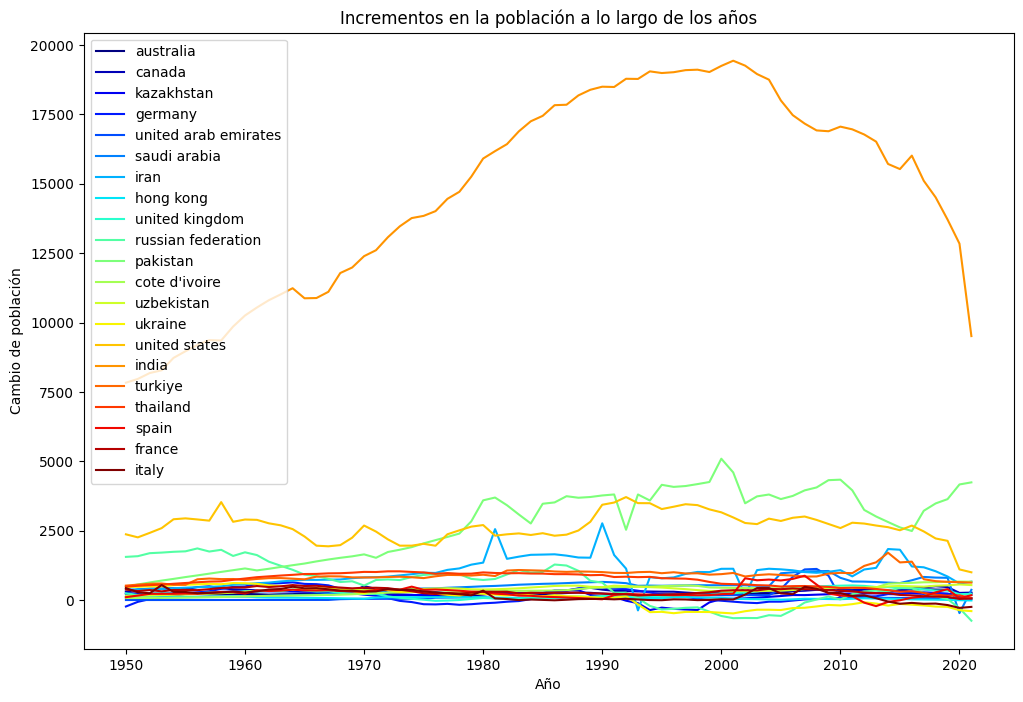

In [174]:
total_popul_df2.plot.line(title='Incrementos en la población a lo largo de los años',figsize=(12,8),ylabel='Cambio de población',xlabel='Año',colormap='jet')

<AxesSubplot: title={'center': 'Incrementos en la población a lo largo de los años'}, xlabel='Año', ylabel='Cambio de población'>

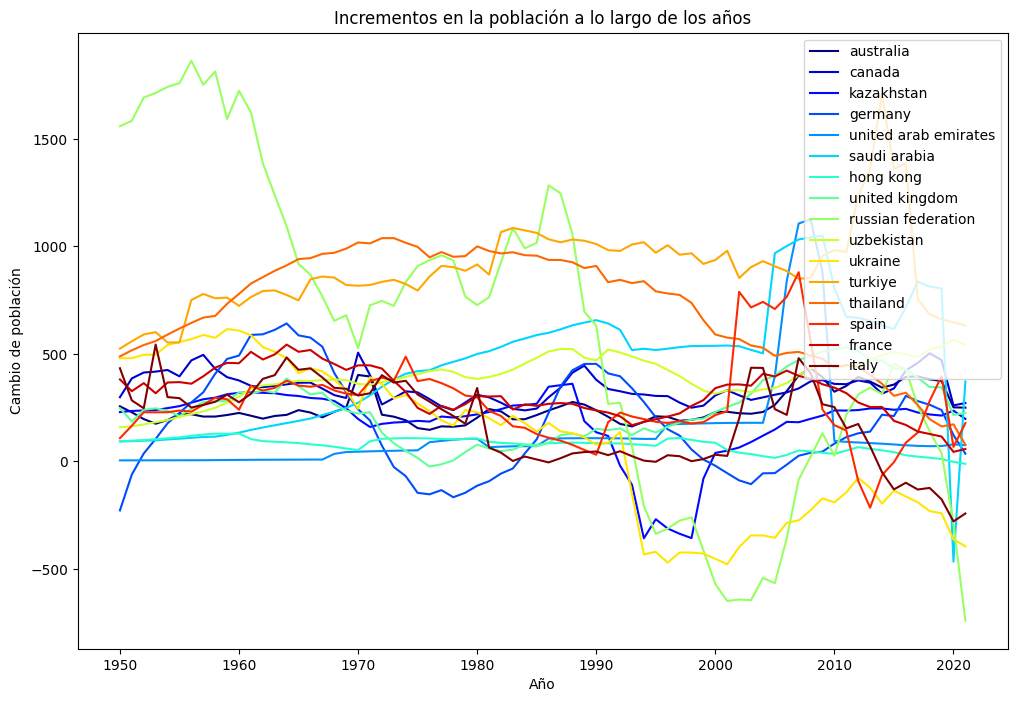

In [178]:
total_popul_df2.drop(['india','united states',"cote d'ivoire",'iran','pakistan'],axis=1).plot.line(title='Incrementos en la población a lo largo de los años',figsize=(12,8),ylabel='Cambio de población',xlabel='Año',colormap='jet')

## Relación entre migraciones y el cambio de la población

In [175]:
popul_change_df = (
    top_df
    .groupby(['year'])[['population_change__thousands_','net_migration_rate__per_1000_population_']]
    .mean()
    .reset_index()
    .sort_values(by='year')
)

Se decidió ampliar acá la tasa de migración para poder comparar con mayor criterio:

In [153]:
popul_change_df = popul_change_df.set_index('year')
popul_change_df['net_migration_rate__per_1000_population_'] = popul_change_df['net_migration_rate__per_1000_population_'] * 100

<AxesSubplot: xlabel='year'>

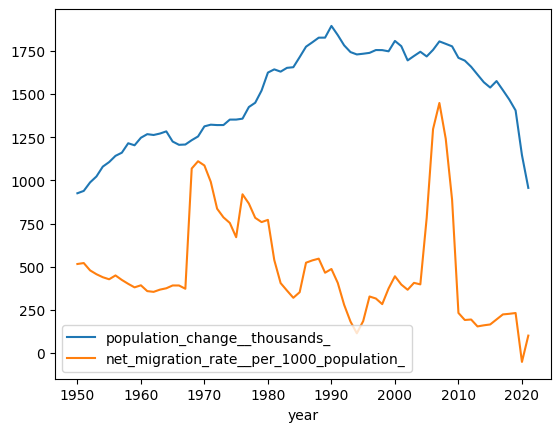

In [154]:
popul_change_df.plot.line()